In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv("C:\\Users\\Swayam\\Desktop\\Abhinab Chakraborty_CU23MSD001A\\Abhinab Chakraborty_CU23MSD001A\\red_wine_data_semi colon sep.csv")
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [119]:
#Count the occurence of each qualities
qualities = [3,4,5,6,7,8]
for num in qualities:
    print('n_',num,'=',df['quality'][df['quality']==num].count())

n_ 3 = 10
n_ 4 = 53
n_ 5 = 681
n_ 6 = 638
n_ 7 = 199
n_ 8 = 18


In [120]:
#Function for box plot
def plot_boxplots(df):
    fig, axes = plt.subplots(1, len(df.columns), figsize= (20,5))
    for i, column_name in enumerate(df.columns):
        df.boxplot(column=column_name, ax= axes[i])
        axes[i].set_title(column_name)
    plt.show()

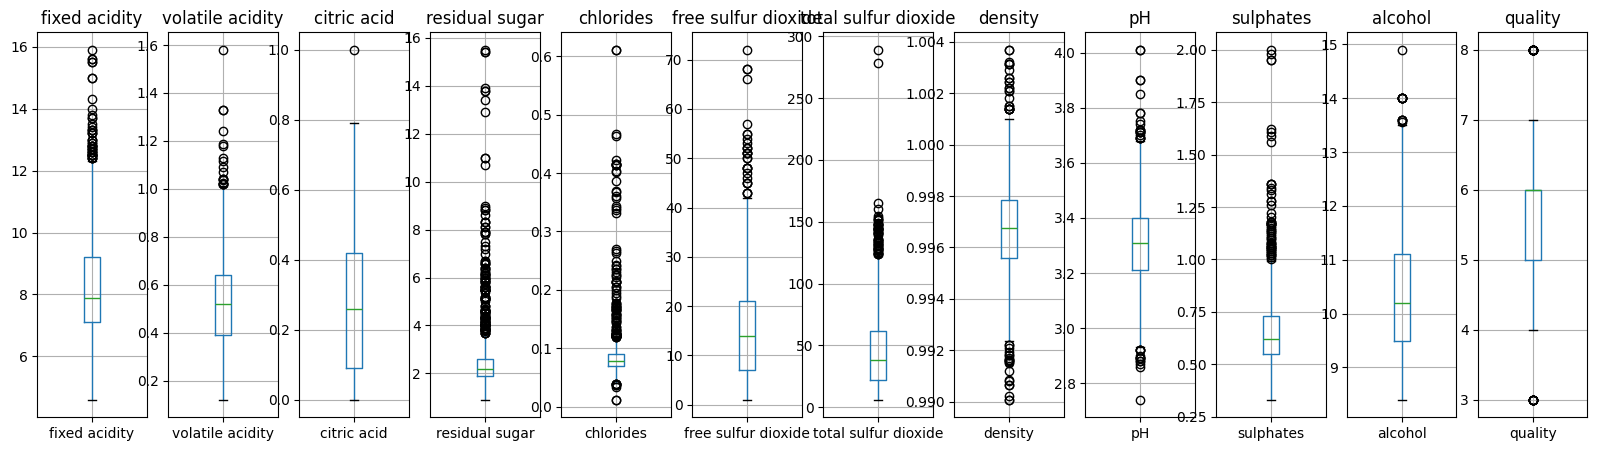

In [121]:
plot_boxplots(df)

In [122]:
#Function to remove outliers
def remove_outliers(df):
    df_no_outliers = df.copy()
    for column_name in df.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_no_outliers[column_name]= df_no_outliers[column_name].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df_no_outliers

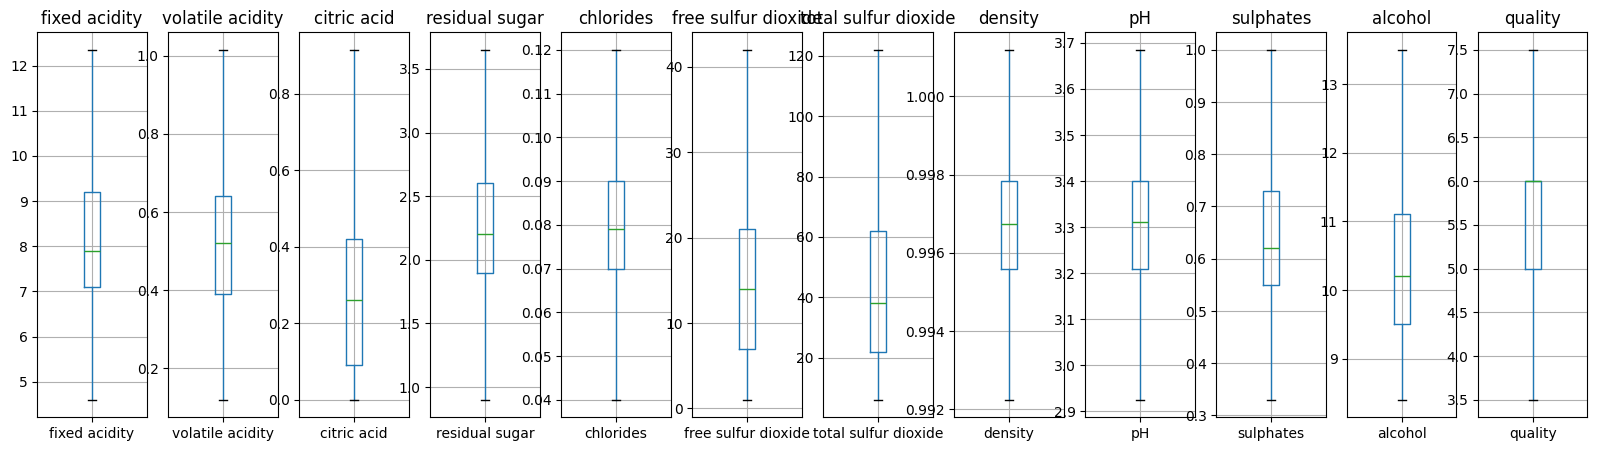

In [123]:
df = remove_outliers(df)
plot_boxplots(df)

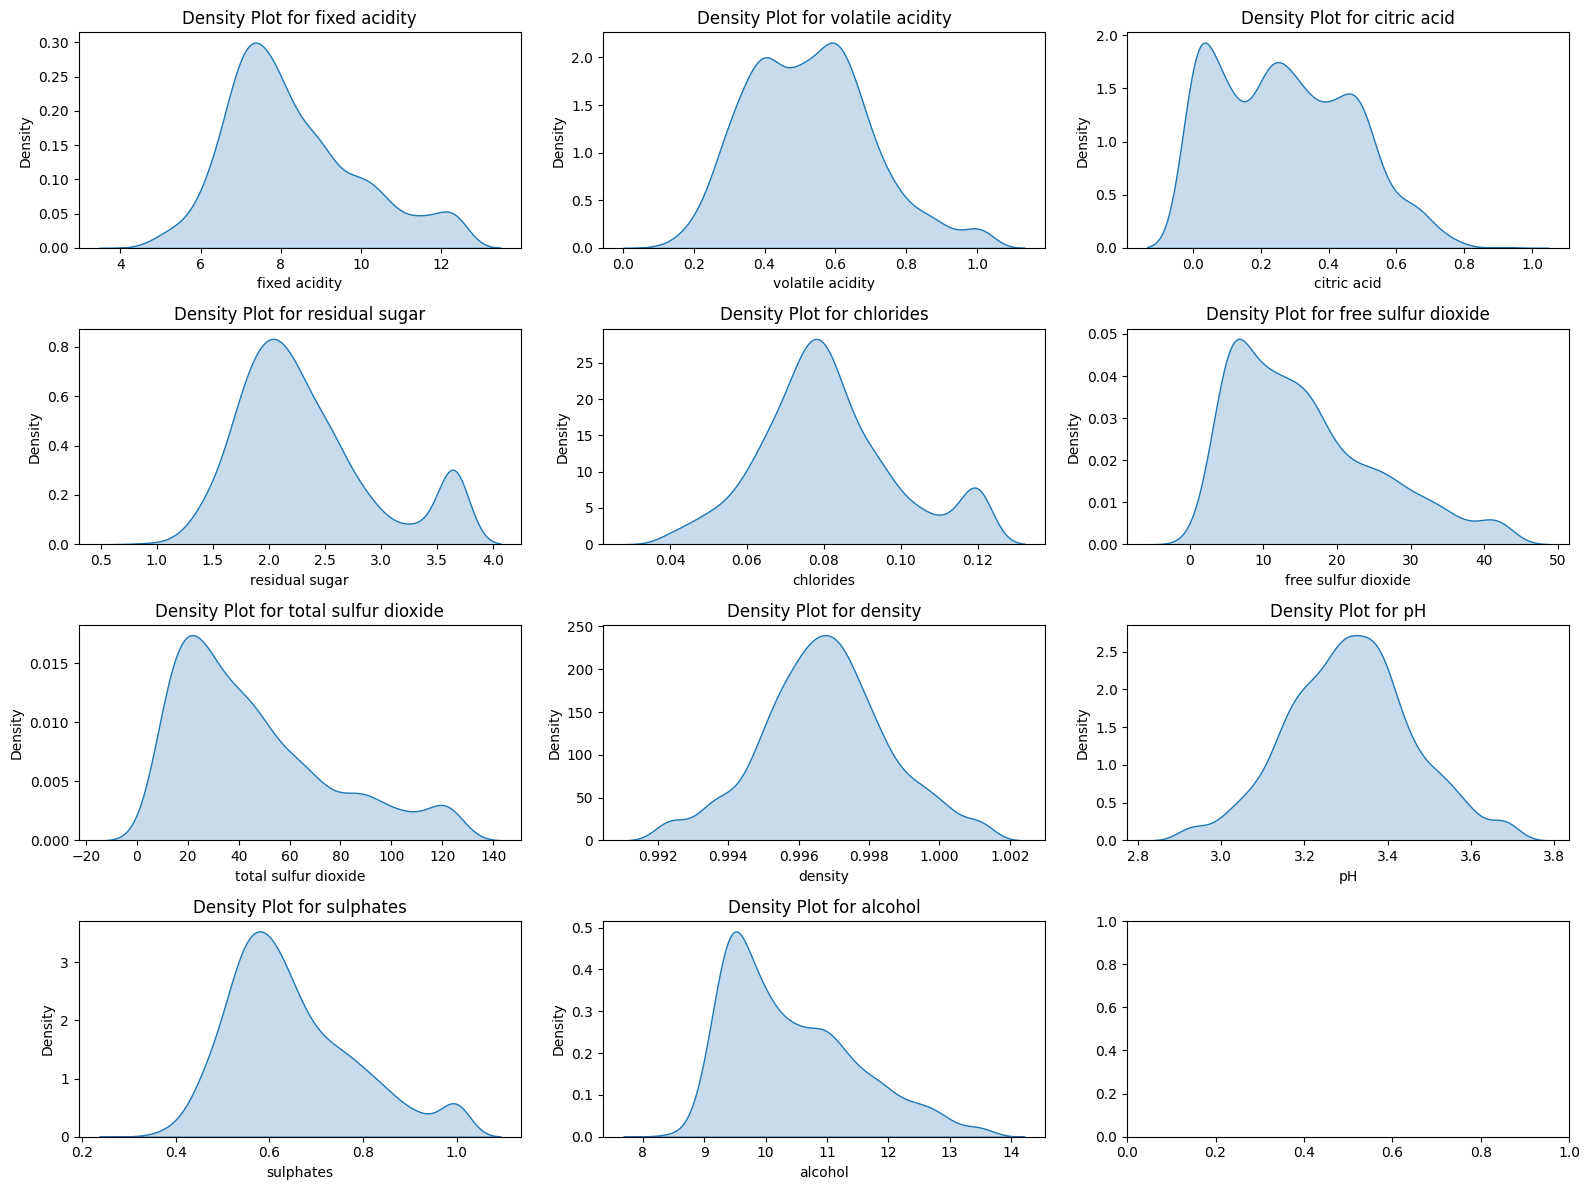

In [124]:
#Density plot of each features
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 12))

for i, feature in enumerate(df.columns[:11]):
    ax = axes[i // 3, i % 3]
    sns.kdeplot(df[feature], ax=ax, fill=True)
    ax.set_title(f'Density Plot for {feature}')

plt.tight_layout()
plt.show()

In [125]:
#Correlation 
corr = df.corr()
corr["quality"].abs().sort_values(ascending=False)

quality                 1.000000
alcohol                 0.480641
volatile acidity        0.388883
sulphates               0.330712
citric acid             0.227717
total sulfur dioxide    0.207643
chlorides               0.180356
density                 0.174567
fixed acidity           0.128373
pH                      0.059040
free sulfur dioxide     0.052357
residual sugar          0.024647
Name: quality, dtype: float64

In [126]:
#Checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [128]:
#Splitting the dataset into test data and train data
split_index = len(df) * 7 // 10

#Split the data
train_data = df[:split_index]
test_data = df[split_index:]

In [129]:
#size of train data
train_data.shape

(1119, 12)

In [130]:
#Size of test data
test_data.shape

(480, 12)

In [131]:
#Occurence of each qualitities in train dataset
train_n_3 =train_data['quality'][train_data['quality']==3].count()
train_n_4 =train_data['quality'][train_data['quality']==4].count()
train_n_5 =train_data['quality'][train_data['quality']==5].count()
train_n_6 =train_data['quality'][train_data['quality']==6].count()
train_n_7 =train_data['quality'][train_data['quality']==7].count()
train_n_8 =train_data['quality'][train_data['quality']==8].count()

train_total_quality = train_data['quality'].count()

print('Train_n_3 =',train_n_3)
print('Train_n_4 =',train_n_4)
print('Train_n_5 =',train_n_5)
print('Train_n_6 =',train_n_6)
print('Train_n_7 =',train_n_7)
print('Train_n_8 =',train_n_8)

print('Total numbers of quality in train data: ',train_total_quality)

Train_n_3 = 0
Train_n_4 = 32
Train_n_5 = 493
Train_n_6 = 420
Train_n_7 = 157
Train_n_8 = 0
Total numbers of quality in train data:  1119


In [132]:
#prob. of each qualaties for training
p_quality_4_train = train_n_4/train_total_quality
p_quality_5_train = train_n_5/train_total_quality
p_quality_6_train = train_n_6/train_total_quality
p_quality_7_train = train_n_7/train_total_quality

print('Prob. of quality 4 for training data= ',p_quality_4_train)
print('Prob. of quality 5 for training data= ',p_quality_5_train)
print('Prob. of quality 6 for training data= ',p_quality_6_train)
print('Prob. of quality 7 for training data= ',p_quality_7_train)

Prob. of quality 4 for training data=  0.028596961572832886
Prob. of quality 5 for training data=  0.44057193923145666
Prob. of quality 6 for training data=  0.3753351206434316
Prob. of quality 7 for training data=  0.14030384271671134


In [133]:
#prob. of each qualaties for training
p_quality_4_train = train_n_4/train_total_quality
p_quality_5_train = train_n_5/train_total_quality
p_quality_6_train = train_n_6/train_total_quality
p_quality_7_train = train_n_7/train_total_quality
print('Prob. of quality 4 for train data= ', p_quality_4_train)
print('Prob. of quality 5 for train data= ', p_quality_5_train)
print('Prob. of quality 6 for train data= ', p_quality_6_train)
print('Prob. of quality 7 for train data= ', p_quality_7_train)

Prob. of quality 4 for train data=  0.028596961572832886
Prob. of quality 5 for train data=  0.44057193923145666
Prob. of quality 6 for train data=  0.3753351206434316
Prob. of quality 7 for train data=  0.14030384271671134


In [134]:
#Occurence of each qualitities in test dataset
test_n_3 =test_data['quality'][test_data['quality']==3].count()
test_n_4 =test_data['quality'][test_data['quality']==4].count()
test_n_5 =test_data['quality'][test_data['quality']==5].count()
test_n_6 =test_data['quality'][test_data['quality']==6].count()
test_n_7 =test_data['quality'][test_data['quality']==7].count()
test_n_8 =test_data['quality'][test_data['quality']==8].count()
test_total_quality = test_data['quality'].count()

print('Test_n_3 =',test_n_3)
print('Test_n_4 =',test_n_4)
print('Test_n_5 =',test_n_5)
print('Test_n_6 =',test_n_6)
print('Test_n_7 =',test_n_7)
print('Test_n_8 =',test_n_8)
print('Total numbers of quality in test data: ',test_total_quality)

Test_n_3 = 0
Test_n_4 = 21
Test_n_5 = 188
Test_n_6 = 218
Test_n_7 = 42
Test_n_8 = 0
Total numbers of quality in test data:  480


In [135]:
#prob. of each qualities for test data set
p_quality_4_test = test_n_4/test_total_quality
p_quality_5_test = test_n_5/test_total_quality
p_quality_6_test =test_n_6/test_total_quality
p_quality_7_test = test_n_7/test_total_quality
print('Prob. of quality 4 in test data= ', p_quality_4_test)
print('Prob. of quality 5 in test data= ', p_quality_5_test)
print('Prob. of quality 6 in test data= ', p_quality_6_test)
print('Prob. of quality 7 in test data= ', p_quality_7_test)

Prob. of quality 4 in test data=  0.04375
Prob. of quality 5 in test data=  0.39166666666666666
Prob. of quality 6 in test data=  0.45416666666666666
Prob. of quality 7 in test data=  0.0875


In [136]:
#finding the mean of each qualities for diffn. features by grouping them togeher for training data set
train_data_mean = train_data.groupby('quality').mean()

In [137]:
#finding the mean of each qualities for diffn. features by grouping them togeher for test data set
test_data_mean = test_data.groupby('quality').mean()

In [138]:
#finding the variance of each qualities for diffn. features by grouping them togeher for train data set
train_data_variance = train_data.groupby('quality').var()

In [139]:
#finding the variance of each qualities for diffn. features by grouping them togeher for test data set
test_data_variance = test_data.groupby('quality').var()

**Train**

**Mean**

In [140]:
#mean of all features for quality 4

quality4_density_mean = train_data_mean['density'][train_data_variance.index == 4].values[0]
quality4_pH_mean = train_data_mean['pH'][train_data_variance.index == 4].values[0]
quality4_alcohol_mean = train_data_mean['alcohol'][train_data_variance.index == 4].values[0]

In [141]:
#mean of all features for quality 5
quality5_density_mean = train_data_mean['density'][train_data_variance.index == 5].values[0]
quality5_pH_mean = train_data_mean['pH'][train_data_variance.index == 5].values[0]
quality5_alcohol_mean = train_data_mean['alcohol'][train_data_variance.index == 5].values[0]

In [142]:
#mean of all features for quality 6
quality6_density_mean = train_data_mean['density'][train_data_variance.index == 6].values[0]
quality6_pH_mean = train_data_mean['pH'][train_data_variance.index == 6].values[0]
quality6_alcohol_mean = train_data_mean['alcohol'][train_data_variance.index == 6].values[0]

In [143]:
#mean of all features for quality 7
quality7_density_mean = train_data_mean['density'][train_data_variance.index == 7].values[0]
quality7_pH_mean = train_data_mean['pH'][train_data_variance.index == 7].values[0]
quality7_alcohol_mean = train_data_mean['alcohol'][train_data_variance.index == 7].values[0]

**Var for train data**

In [144]:
#var. of all features for quality 4
quality4_density_variance = train_data_variance['density'][train_data_variance.index == 4].values[0]
quality4_pH_variance = train_data_variance['pH'][train_data_variance.index == 4].values[0]
quality4_alcohol_variance = train_data_variance['alcohol'][train_data_variance.index == 4].values[0]

In [145]:
#var. of all features for quality 5
quality5_density_variance = train_data_variance['density'][train_data_variance.index == 5].values[0]
quality5_pH_variance = train_data_variance['pH'][train_data_variance.index == 5].values[0]
quality5_alcohol_variance = train_data_variance['alcohol'][train_data_variance.index == 5].values[0]

In [146]:
#var. of all features for quality 6
quality6_density_variance = train_data_variance['density'][train_data_variance.index == 6].values[0]
quality6_pH_variance = train_data_variance['pH'][train_data_variance.index == 6].values[0]
quality6_alcohol_variance = train_data_variance['alcohol'][train_data_variance.index == 6].values[0]

In [147]:
#var. of all features for quality 7
quality7_density_variance = train_data_variance['density'][train_data_variance.index == 7].values[0]
quality7_pH_variance = train_data_variance['pH'][train_data_variance.index == 7].values[0]
quality7_alcohol_variance = train_data_variance['alcohol'][train_data_variance.index == 7].values[0]

In [148]:
#new data 
wine = pd.DataFrame()
wine['density'] = [0.9978]
wine['pH'] = [3.51]
wine['alcohol'] = [9.4]

wine

,density,pH,alcohol
0,0.9978,3.51,9.4


In [149]:
#conditional probability
def p_x_given_y(x, mean_y, variance_y):
    p = 1/(np.sqrt(2*np.pi*variance_y))*np.exp((-(x-mean_y)**2)/(2*variance_y))
    return p

In [150]:
#posterior(Train quality 4)
p_quality_4_train * \
p_x_given_y(wine['density'][0],quality4_density_mean, quality4_density_variance) * \
p_x_given_y(wine['pH'][0],quality4_pH_mean, quality4_pH_variance) * \
p_x_given_y(wine['alcohol'][0],quality4_alcohol_mean, quality4_alcohol_variance) 

2.671277025574224

In [151]:
#posterior(Train quality 5)
p_quality_5_train * \
p_x_given_y(wine['density'][0],quality5_density_mean, quality5_density_variance) * \
p_x_given_y(wine['pH'][0],quality5_pH_mean, quality5_pH_variance) * \
p_x_given_y(wine['alcohol'][0],quality5_alcohol_mean, quality5_alcohol_variance) 

59.35635495296367

In [152]:
#posterior(Train quality 6)
p_quality_6_train * \
p_x_given_y(wine['density'][0],quality6_density_mean, quality6_density_variance) * \
p_x_given_y(wine['pH'][0],quality6_pH_mean, quality6_pH_variance) * \
p_x_given_y(wine['alcohol'][0],quality6_alcohol_mean, quality6_alcohol_variance) 

15.58116224214951

In [153]:
#posterior(Train quality 7)
p_quality_7_train * \
p_x_given_y(wine['density'][0],quality7_density_mean, quality7_density_variance) * \
p_x_given_y(wine['pH'][0],quality7_pH_mean, quality7_pH_variance) * \
p_x_given_y(wine['alcohol'][0],quality7_alcohol_mean, quality7_alcohol_variance) 

0.7252931484186289

In [172]:
# Unnormalized posterior probabilities
unnormalized_probs = np.array([2.671277025574224, 59.35635495296367,15.58116224214951,0.7252931484186289])

# Calculate the sum of probabilities
sum_probs = np.sum(unnormalized_probs)

# Normalize probabilities
normalized_probs = unnormalized_probs / sum_probs

# Print the results
qualities = ['Quality 4', 'Quality 5', 'Quality 6', 'Quality 7']
print("Normalized probabilities:")
for quality, prob in zip(qualities, normalized_probs):
    print(f"{quality}: {prob:.3f}")

# Verify that the sum of normalized probabilities is 1
print(f"\nSum of normalized probabilities: {np.sum(normalized_probs):.3f}")

Normalized probabilities:
Quality 4: 0.034
Quality 5: 0.758
Quality 6: 0.199
Quality 7: 0.009

Sum of normalized probabilities: 1.000


**test dataset**

**mean**

In [154]:
#mean of all features for quality 4
quality4_density_mean_test = test_data_mean['density'][test_data_variance.index == 4].values[0]
quality4_pH_mean_test = test_data_mean['pH'][test_data_variance.index == 4].values[0]
quality4_alcohol_mean_test = test_data_mean['alcohol'][test_data_variance.index == 4].values[0]

In [155]:
#mean of all features for quality 5
quality5_density_mean_test = test_data_mean['density'][test_data_variance.index == 5].values[0]
quality5_pH_mean_test = test_data_mean['pH'][test_data_variance.index == 5].values[0]
quality5_alcohol_mean_test = test_data_mean['alcohol'][test_data_variance.index == 5].values[0]

In [156]:
#mean of all features for quality 6
quality6_density_mean_test = test_data_mean['density'][test_data_variance.index == 6].values[0]
quality6_pH_mean_test = test_data_mean['pH'][test_data_variance.index == 6].values[0]
quality6_alcohol_mean_test = test_data_mean['alcohol'][test_data_variance.index == 6].values[0]

In [157]:
#mean of all features for quality 7
quality7_density_mean_test = test_data_mean['density'][test_data_variance.index == 7].values[0]
quality7_pH_mean_test = test_data_mean['pH'][test_data_variance.index == 7].values[0]
quality7_alcohol_mean_test = test_data_mean['alcohol'][test_data_variance.index == 7].values[0]

**Variance**

In [158]:
#var. of all features for quality 4
quality4_density_variance_test = test_data_variance['density'][test_data_variance.index == 4].values[0]
quality4_pH_variance_test = test_data_variance['pH'][test_data_variance.index == 4].values[0]
quality4_alcohol_variance_test = test_data_variance['alcohol'][test_data_variance.index == 4].values[0]

In [159]:
#var. of all features for quality 5
quality5_density_variance_test = test_data_variance['density'][test_data_variance.index == 5].values[0]
quality5_pH_variance_test = test_data_variance['pH'][test_data_variance.index == 5].values[0]
quality5_alcohol_variance_test = test_data_variance['alcohol'][test_data_variance.index == 5].values[0]

In [160]:
#var. of all features for quality 6
quality6_density_variance_test = test_data_variance['density'][test_data_variance.index == 6].values[0]
quality6_pH_variance_test = test_data_variance['pH'][test_data_variance.index == 6].values[0]
quality6_alcohol_variance_test = test_data_variance['alcohol'][test_data_variance.index == 6].values[0]

In [161]:
#var. of all features for quality 7
quality7_density_variance_test = test_data_variance['density'][test_data_variance.index == 7].values[0]
quality7_pH_variance_test = test_data_variance['pH'][test_data_variance.index == 7].values[0]
quality7_alcohol_variance_test = test_data_variance['alcohol'][test_data_variance.index == 7].values[0]

**Posterior prob.**

In [174]:
#posterior(Test quality 4)
p_quality_4_test * \
p_x_given_y(wine['density'][0],quality4_density_mean_test, quality4_density_variance_test) * \
p_x_given_y(wine['pH'][0],quality4_pH_mean_test, quality4_pH_variance_test) * \
p_x_given_y(wine['alcohol'][0],quality4_alcohol_mean_test, quality4_alcohol_variance_test)

1.9163592611797142

In [163]:
#posterior(Test quality 5)
p_quality_5_test * \
p_x_given_y(wine['density'][0],quality5_density_mean_test, quality5_density_variance_test) * \
p_x_given_y(wine['pH'][0],quality5_pH_mean_test, quality5_pH_variance_test) * \
p_x_given_y(wine['alcohol'][0],quality5_alcohol_mean_test, quality5_alcohol_variance_test) 

21.02557729711474

In [164]:
#posterior(Test quality 6)
p_quality_6_test * \
p_x_given_y(wine['density'][0],quality6_density_mean_test, quality6_density_variance_test) * \
p_x_given_y(wine['pH'][0],quality6_pH_mean_test, quality6_pH_variance_test) * \
p_x_given_y(wine['alcohol'][0],quality6_alcohol_mean_test, quality6_alcohol_variance_test) 

7.837194040612916

In [165]:
#posterior(Test quality 7)
p_quality_7_test * \
p_x_given_y(wine['density'][0],quality7_density_mean_test, quality7_density_variance_test) * \
p_x_given_y(wine['pH'][0],quality7_pH_mean_test, quality7_pH_variance_test) * \
p_x_given_y(wine['alcohol'][0],quality7_alcohol_mean_test, quality7_alcohol_variance_test) 

0.11199252552829989

In [175]:
# Unnormalized posterior probabilities
unnormalized_probs = np.array([1.9163592611797142, 21.02557729711474, 7.837194040612916, 0.11199252552829989 ])

# Calculate the sum of probabilities
sum_probs = np.sum(unnormalized_probs)

# Normalize probabilities
normalized_probs = unnormalized_probs / sum_probs

# Print the results
qualities = ['Quality 4', 'Quality 5', 'Quality 6', 'Quality 7']
print("Normalized probabilities:")
for quality, prob in zip(qualities, normalized_probs):
    print(f"{quality}: {prob:.3f}")

# Verify that the sum of normalized probabilities is 1
print(f"\nSum of normalized probabilities: {np.sum(normalized_probs):.3f}")

Normalized probabilities:
Quality 4: 0.062
Quality 5: 0.681
Quality 6: 0.254
Quality 7: 0.004

Sum of normalized probabilities: 1.000


**Knn**

In [166]:
#Function to calculate euclidean distance
def euclidean_distance(point1, point2):
    distance = 0.0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return distance ** 0.5

In [167]:
#Function of KNN model
def knn(training_data, test_point, k):
    distances = []
    
    # Calculate the distance from the test point to all training points
    for index, data in training_data.iterrows():
        point, label = data[:-1], data[-1]  # point = [density, pH, alcohol], label = quality
        dist = euclidean_distance(point, test_point)
        distances.append((dist, label))
    
    # Sort the distances list by distance
    distances.sort(key=lambda x: x[0])
    
    # Get the labels of the k nearest neighbors
    neighbors = [distances[i][1] for i in range(k)]
    
    # Return the majority label
    return max(set(neighbors), key=neighbors.count)

In [168]:
# Training data: df_knn = train_data[['density','pH','alcohol','quality']]
df_knn = train_data[['density', 'pH', 'alcohol', 'quality']]

# Test data: test_df_knn = wine[['density','pH','alcohol']]
test_df_knn = wine[['density', 'pH', 'alcohol']]

# Set the number of neighbors
k = 3

# Predicting the quality for each test data point
predicted_labels = []
for index, test_point in test_df_knn.iterrows():
    predicted_label = knn(df_knn, test_point, k)
    predicted_labels.append(predicted_label)

# Output the predicted labels for the test set
print('The predicted quality for the new dataset is: ',predicted_labels)


C:\Users\Swayam\AppData\Local\Temp\ipykernel_6744\3113038099.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  point, label = data[:-1], data[-1]  # point = [density, pH, alcohol], label = quality
C:\Users\Swayam\AppData\Local\Temp\ipykernel_6744\3115395000.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distance += (point1[i] - point2[i]) ** 2


The predicted quality for the new dataset is:  [5.0]
